# How Many COVID-19 Deaths Happened in California?  What Do We Know About the California Deaths, Particularly in the Year They Peaked?

*Setup*

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Sources/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
print(df.shape)
df.head()

(137700, 12)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,NaN
1,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,NaN
2,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,NaN
3,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,NaN
4,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,NaN


*Visualization 1*

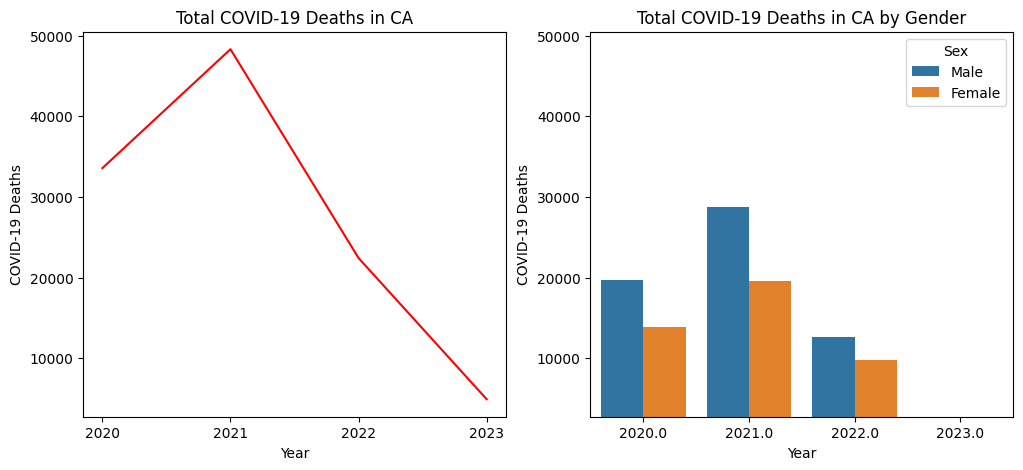

In [89]:
# Create appropriate filters
filter_mf = df[(df["Group"] == "By Year") & (df["State"] == "California") & (df["Age Group"] == "All Ages") & (df["Sex"].isin(["Male", "Female"]))]
filter_all = df[(df["Group"] == "By Year") & (df["State"] == "California") & (df["Age Group"] == "All Ages") & (df["Sex"] == "All Sexes")]

# Draw figures
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=filter_mf, x="Year", y="COVID-19 Deaths", hue="Sex", ax=ax[1])
sns.lineplot(data=filter_all, x="Year", y="COVID-19 Deaths", color="red", ax=ax[0])
ax[0].set_title("Total COVID-19 Deaths in CA")
ax[1].set_title("Total COVID-19 Deaths in CA by Gender")
ax[1].set_ylim(ax[0].get_ylim()) # Make the y-axes match
ax[0].set_xticks(range(2020,2024,1)) # Prevent .5 years from showing up
plt.show()

*Visualization 2*

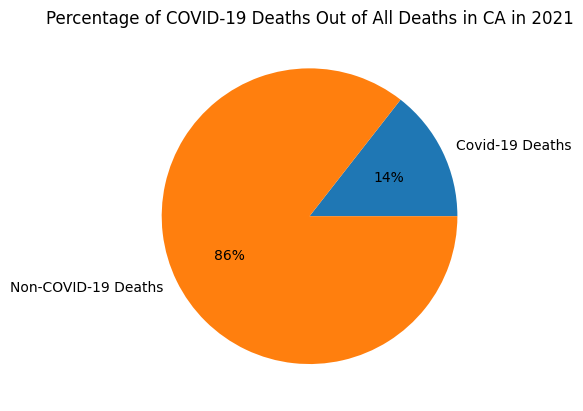

In [92]:
# Create new percentage columns
df["Percentage of COVID-19 Deaths"] = df["COVID-19 Deaths"] / df["Total Deaths"]
df["Percentage of Non-COVID-19 Deaths"] = (df["Total Deaths"] - df["COVID-19 Deaths"]) / df["Total Deaths"]

# Create new filter (I picked 2021 because it was the peak year in the last charts)
filter_ca2021 = df[(df["Group"] == "By Year") & (df["Year"] == 2021) & (df["State"] == "California") & (df["Sex"] == "All Sexes") & (df["Age Group"] == "All Ages")]

# Extract subset of data (yields 1 row, which is why we can use iloc[0] on the next line)
filter_ca2021_percentages = filter_ca2021[["Percentage of COVID-19 Deaths", "Percentage of Non-COVID-19 Deaths"]]

# Create and customize the pie chart
plt.pie(list(filter_ca2021_percentages.iloc[0]), labels=["Covid-19 Deaths", "Non-COVID-19 Deaths"], autopct='%.0f%%')
plt.title("Percentage of COVID-19 Deaths Out of All Deaths in CA in 2021")
plt.show()

*Visualization 3*

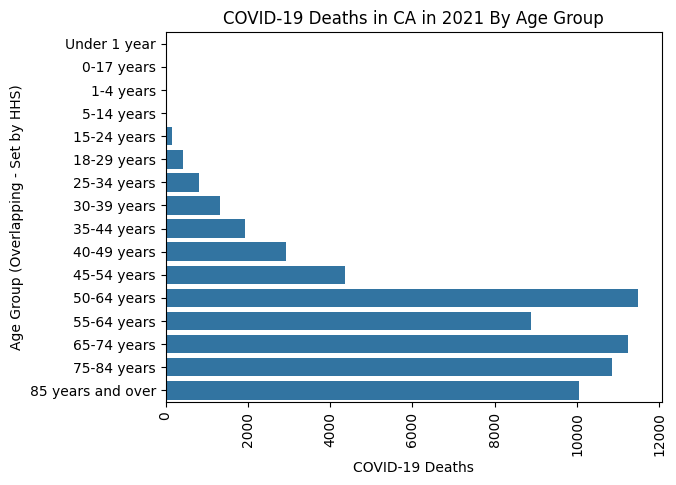

In [112]:
# Create new filter
filter_ca2021_w_age_groups = df[(df["Group"] == "By Year") & (df["Year"] == 2021) & (df["State"] == "California") & (df["Sex"] == "All Sexes") & (df["Age Group"] != "All Ages")]

# Create chart
sns.barplot(data=filter_ca2021_w_age_groups, y="Age Group", x="COVID-19 Deaths")
plt.xticks(rotation=90)
plt.title("COVID-19 Deaths in CA in 2021 By Age Group")
plt.ylabel("Age Group (Overlapping - Set by HHS)")
plt.show()

From the visualizations, we can say that the COVID-19 deaths in California peaked in 2021 and that more men died than women in every year for which there is data.  Also, in 2021, COVID-19 deaths made up 14% of all California deaths, and most of those deaths occurred in those 50 years of age and older.  